In [1]:
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("supermarket_sales.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  Rating         1000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB


#### Question 1: Example

how many purchases (rows in the table, not 'Quantity') were done by Male and Female customers?

#### Question 1 - solution: Example

In [3]:
m_amount = len(df[df['Gender'] == 'Male'])
f_amount = len(df[df['Gender'] == 'Female'])

# do not print any intermediate results
# print *only your final* result in the form of a data frame (for clarity)

result = [('purchases by male', m_amount), ('purchases by female', f_amount)]
pd.DataFrame(result)

,0,1
0,purchases by male,507
1,purchases by female,493


#### Question 2

what is the average Rating for products in the "Health and beauty" Product line?

#### Question 2 - Solution

In [4]:
HB = df[df['Product line'] == 'Health and beauty']
HealthAndBeautyMean = HB['Rating'].mean()
HealthAndBeautyMean = round(HealthAndBeautyMean,3)
result = [('Average Rating in "Health and beauty" Category', HealthAndBeautyMean)]
pd.DataFrame(result)

,0,1
0,"Average Rating in ""Health and beauty"" Category",7.003


#### Question 3

how many products in each Product line were sold during the first half (days 1-15 including) of March 2019?
use the 'Quantity' column for that purpose - the number of products purchased

#### Question 3 - Solution

In [5]:

def paddingZero(str):
    if(len(str) == 1):
        return '0' + str
    else:
        return str

def dateFormat(str_date):
    date = str_date.split("/")
    year = date[2]
    month = paddingZero(date[0])
    day = paddingZero(date[1])
    return year + '-' + month + '-' + day
df['Date'] = df["Date"].apply(dateFormat)
SalesMarch = df.sort_values(by='Date')
SalesMarch = SalesMarch.loc[SalesMarch['Date'].between("2019-03-01", "2019-03-15")]
MarchSalesCount = SalesMarch["Quantity"].sum()
result = {'Question':['Product sold in first half of march'],'Answer':[MarchSalesCount]}
pd.DataFrame(result)

,Question,Answer
0,Product sold in first half of march,1091


#### Question 4

plot a bar chart showing the number of products per category computed in the previous question

#### Question 4 - Solution

<AxesSubplot:xlabel='Category', ylabel='Count'>

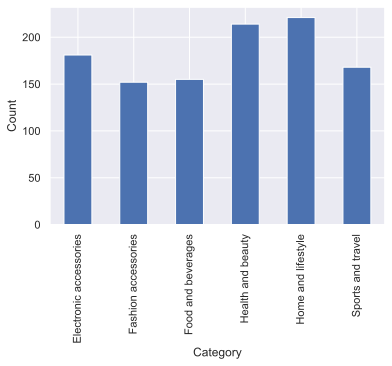

In [6]:
result = SalesMarch.groupby('Product line')['Quantity'].sum()
result.plot(kind='bar',xlabel='Category', ylabel='Count')

#### Question 5

plot the same bar chart as above - split by gender (male, female)
the split bar chart is called stacked bar: look up "plot stacked bar charts from a dataframe" to see how to plot it

#### Question 5 - Soultion

<AxesSubplot:>

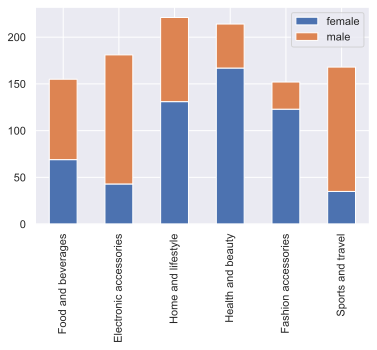

In [7]:
Categorys = SalesMarch['Product line'].unique()
SalesMales = list()
SalesFemales = list()
for cat in Categorys:
    dfMaleCat = SalesMarch[(SalesMarch['Gender'] == 'Male') & (SalesMarch['Product line'] == cat)]
    dfFemaleCat = SalesMarch[(SalesMarch['Gender'] == 'Female') & (SalesMarch['Product line'] == cat)]
    SalesMales.append(dfMaleCat['Quantity'].sum())
    SalesFemales.append(dfFemaleCat['Quantity'].sum())
GenderSales = pd.DataFrame({'female': SalesFemales, 'male': SalesMales}, index=list(Categorys))
GenderSales.plot.bar(stacked=True)

#### Question 6

what is the total sales ('Total') done by each Payment type during the whole period?

#### Question 6 - Soultion

In [8]:
result = SalesMarch.groupby('Payment')['Total'].sum().round(2)
pd.DataFrame(result)

,Total
Payment,
Cash,18369.96
Credit card,20574.58
Ewallet,22381.60


#### Question 7

plot a chart with total sales ('Total') of the "Sports and travel" products by calendar week (Monday-Sunday): 
note the first and the last week can be incomplete (for instance, the data starts on Wednesday, and ends on Friday)
use the full data you have in the dataset (not the first two weeks of March)
assume all our sales data spans the same year (for instance, 2019)

you can make use of the isocalendar() function: https://www.geeksforgeeks.org/isocalendar-function-of-datetime-date-class-in-python/

x axis are weeks enumerated from the first to the last calendar week in the data
y axis is the total sales that week

#### Question 7 - Solution

<AxesSubplot:xlabel='Week No#'>

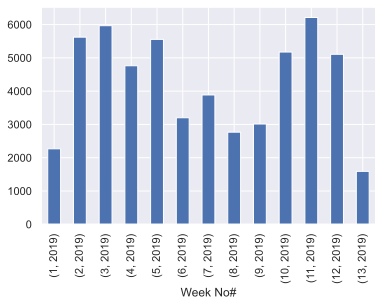

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
def isocalendar(date):
    year,week,day = date.isocalendar()
    return (week,year)
df['Week No#'] = df['Date'].apply(isocalendar)
Sport_Travel = df[df["Product line"] == "Sports and travel"]
result = Sport_Travel.groupby('Week No#')['Total'].sum()
result.plot.bar()

#### Question 8

plot a line chart of total sales ('Total') per hour in our dataset
the x axis will be an hour (e.g., 9, 10, 11), and the y axis will be the total amout of sales during that hour
(e.g., for 9 - all sales between 09:00 and 10:00)

#### Question 8 - Solution

<AxesSubplot:title={'center':'Sales per Hour'}, xlabel='Hour', ylabel='Total sales'>

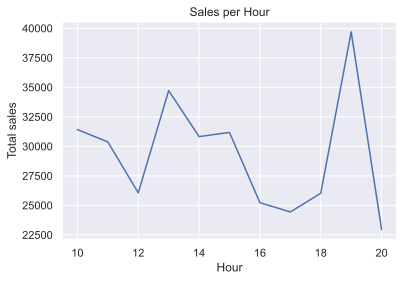

In [10]:
def round_time(time):
    return '' + time.split(":")[0]
df['Time rounded'] = df['Time'].apply(round_time)
df.groupby('Time rounded')['Total'].sum().plot(kind = 'line',xlabel='Hour',ylabel='Total sales',title = 'Sales per Hour')

#### Question 9

plot a line chart of the total number of purchases (rows) per hour in our dataset
the x axis will be an hour (e.g., 9, 10, 11), and the y axis will be the total number of purchases during that hour
(e.g., for 9 - all sales between 09:00 and 10:00)

#### Question 9 - solution

<AxesSubplot:xlabel='Hour', ylabel='Purchases'>

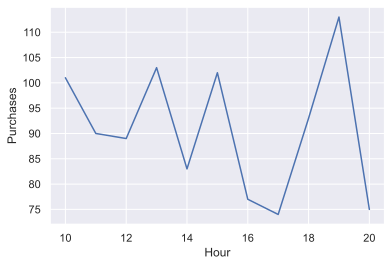

In [11]:
df.groupby('Time rounded').size().plot(kind='line',xlabel = 'Hour',ylabel='Purchases')

#### Question 10

what is the total income of strategic products by City?
for each strategic product (as detailed in the product_types_strategy.csv file), display break down of total sales by cities

#### Question 10 - Solution

In [12]:
df2 = pd.read_csv("product_types_strategy.csv")
df2 = df2.rename(columns={'Product type':'Product line','strategic':'Strategic'})
df = pd.merge(df,df2,on='Product line')
df3 = df[['City','Product line','Strategic','Total']]
df3 = df3[df3['Strategic'] == 'yes']
df3.groupby(['Product line','City']).sum().round(2)

Total
Product line           City               
Electronic accessories Mandalay   17051.44
                       Naypyitaw  18968.97
                       Yangon     18317.11
Food and beverages     Mandalay   15214.89
                       Naypyitaw  23766.85
                       Yangon     17163.10
Health and beauty      Mandalay   19980.66
                       Naypyitaw  16615.33
                       Yangon     12597.75
Sports and travel      Mandalay   19988.20
                       Naypyitaw  15761.93
                       Yangon     19372.70